In [2]:
import requests                    # for "get" request to API
import json                        # parse json into a list
import pandas as pd                # working with data frames
import datetime as dt              # working with dates
import matplotlib.pyplot as plt    # plot data
import qgrid                       # display dataframe in notebooks 

In [3]:
def get_binance_bars(symbol, interval, startTime, endTime):
 
    url = "https://api.binance.com/api/v3/klines"
 
    startTime = str(int(startTime.timestamp() * 1000))
    endTime = str(int(endTime.timestamp() * 1000))
    limit = '1000'
 
    req_params = {"symbol" : symbol, 'interval' : interval, 'startTime' : startTime, 'endTime' : endTime, 'limit' : limit}
 
    df = pd.DataFrame(json.loads(requests.get(url, params = req_params).text))
 
    if (len(df.index) == 0):
        return None
     
    df = df.iloc[:, 0:6]
    df.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume']
 
    df.open      = df.open.astype("float")
    df.high      = df.high.astype("float")
    df.low       = df.low.astype("float")
    df.close     = df.close.astype("float")
    df.volume    = df.volume.astype("float")
    
    df['adj_close'] = df['close']
     
    df.index = [dt.datetime.fromtimestamp(x / 1000.0) for x in df.datetime]
 
    return df

In [86]:
def get_all_historical_data(coin,last_datetime = dt.datetime(2013, 1, 1), interval = "1h"):
    df_list = []

    while True:
        new_df = get_binance_bars(coin, interval, last_datetime, dt.datetime.now())
        print(last_datetime)
        if len(new_df) < 5:
            break
        df_list.append(new_df)
        last_datetime = max(new_df.index) + dt.timedelta(0, 1)
    df = pd.concat(df_list)
    return df

In [88]:
btc_hist = get_all_historical_data_since("BTCUSDT",dt.datetime(2020,12,1))

2020-12-01 00:00:00
2021-01-11 19:00:01
2021-02-04 21:00:01


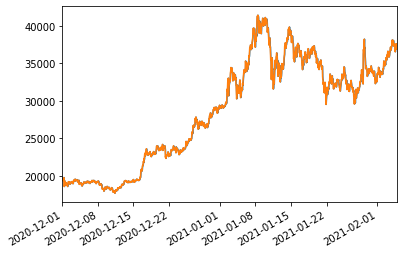

In [116]:
btc_hist['open'].astype('float').plot()
btc_hist['close'].astype('float').plot()